# Рынок заведений общественного питания Москвы

# Содержание

1. [Загрузка и подготовка данных к анализу](#1.-Загрузка-и-подготовка-данных-к-анализу)


2. [Анализ данных](#2.-Анализ-данных)

  2.1. [Соотношение видов объектов общественного питания по количеству](#2.1.-Соотношение-видов-объектов-общественного-питания-по-количеству)

  2.2. [Соотношение сетевых и несетевых заведений по количеству](#2.2.-Соотношение-сетевых-и-несетевых-заведений-по-количеству)

  2.3. [Объекты общественного питания, для которых характерно сетевое распространение](#2.3.-Объекты-общественного-питания,-для-которых-характерно-сетевое-распространение)

  2.4. [Число посадочных мест в сетевых заведениях](#2.4.-Число-посадочных-мест-в-сетевых-заведениях)

  2.5. [Среднее количество посадочных мест для каждого вида объекта общественного питания](#2.5.-Среднее-количество-посадочных-мест-для-каждого-вида-объекта-общественного-питания)

  2.6. [Топ-10 улиц по количеству объектов общественного питания](#2.6.-Топ-10-улиц-по-количеству-объектов-общественного-питания)

  2.7. [Улицы с одним объектом общественного питания](#2.7.-Улицы-с-одним-объектом-общественного-питания)

  2.8. [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#2.8.-Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания)

  2.9. [Выводы и рекомендации](#2.9.-Выводы-и-рекомендации)


3. [Презентация](#3.-Презентация)

# 1. Загрузка и подготовка данных к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('/datasets/rest_data.csv')
except:
    df = pd.read_csv('rest_data.csv')

In [3]:
df.sample(5)

,id,object_name,chain,object_type,address,number
8982,159373,ПЕКАРНЯ «АМБАР»,нет,магазин (отдел кулинарии),"город Москва, Ангелов переулок, дом 8",10
5975,29424,ГОУ СОШ № 1595,нет,столовая,"город Москва, 2-я Вольская улица, дом 7, корпус 2",184
819,124628,Сабвей,да,предприятие быстрого обслуживания,"город Москва, Садовническая улица, дом 42, стр...",40
14268,209095,Суши-бар YOCOSO,нет,предприятие быстрого обслуживания,"город Москва, улица Перерва, дом 43, корпус 1",0
3690,20420,БАР СПОРТКЛУБА,нет,бар,"город Москва, площадь Европы, дом 2",10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Данные загружены, пропусков нет.

In [5]:
df[['id', 'object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

0

Дубликаты строк отсутствуют.

In [6]:
df[['object_name', 'address']].duplicated().sum()

207

Есть строки с одинаковыми названиями заведений и адресом.

In [7]:
df[df[['object_name', 'address']].duplicated() == True]

,id,object_name,chain,object_type,address,number
114,28613,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
579,149227,Общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
...,...,...,...,...,...,...
15217,214146,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15241,210885,KFC,да,предприятие быстрого обслуживания,"город Москва, Манежная площадь, дом 1, строение 2",41
15253,214872,Чайхона №1,да,кафе,"город Москва, Кутузовский проспект, дом 57",0
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


Это столовые ВУЗов, заведения рядом с ЖД вокзалами или в крупных ТЦ. Они имеют разный id, число посадочных мест и могут относиться к разным типам объекта общественного питания, поэтому можно не принимать их за дубликаты.

Можно привести колонку chain (принадлежность ресторана к сети) к типу данных bool, но на всякий случай лучше сохранить исходную колонку и на её основе сделать новую.

In [8]:
df['chain_bool'] = df['chain']

In [9]:
df.loc[df['chain_bool'] == 'да', 'chain_bool'] = True

In [10]:
df.loc[df['chain_bool'] == 'нет', 'chain_bool'] = False

In [11]:
df['chain_bool'] = df['chain_bool'].astype('bool')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   chain_bool   15366 non-null  bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 735.4+ KB


Можно сократить названия некоторых видов объектов общественного питания.

In [13]:
df.loc[df['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'fast food'
df.loc[df['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'отдел кулинарии'

# 2. Анализ данных
## 2.1. Соотношение видов объектов общественного питания по количеству

Можно использовать функцию `value_counts()` и передать её результат в круговую диаграмму.

In [14]:
object_type = df['object_type'].value_counts()

In [15]:
object_type.columns = ['object_type', 'count']

In [16]:
object_type

кафе               6099
столовая           2587
ресторан           2285
fast food          1923
бар                 856
буфет               585
кафетерий           398
закусочная          360
отдел кулинарии     273
Name: object_type, dtype: int64

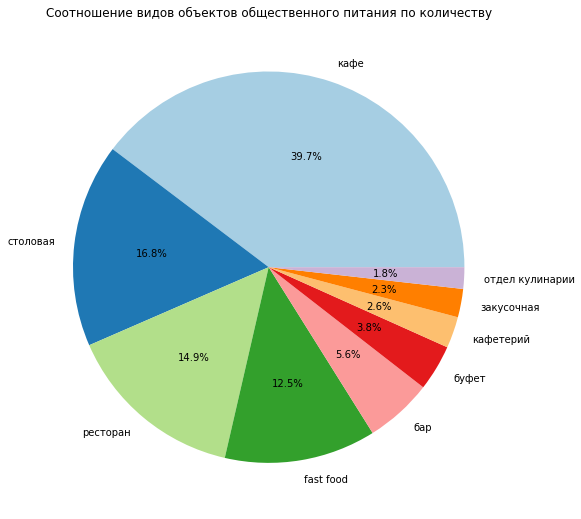

In [17]:
sns.set_palette('Paired')
object_type.plot(kind = 'pie', x = 'object_type', y = 'count', autopct="%.1f%%", figsize = (9, 9))
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.ylabel(None)
#plt.savefig('1.png', dpi = 1000)
plt.show()


Кафе занимают примерно 40 % от всех заведений общественного питания Москвы.

Им уступают столовые, рестораны и предприятия быстрого обслуживания (17, 15 и 12,5 % соответственно).

Доля прочих видов объектов по отдельности не превышает 6 %.

## 2.2. Соотношение сетевых и несетевых заведений по количеству

Используется таже последоваельность действий.

In [18]:
chain = df['chain_bool'].value_counts()

In [19]:
chain

False    12398
True      2968
Name: chain_bool, dtype: int64

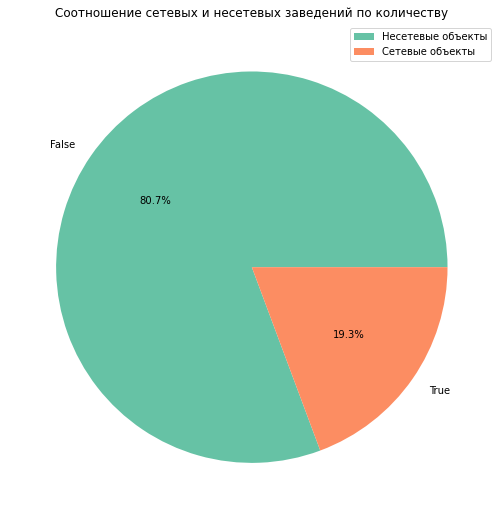

In [20]:
sns.set_palette('Set2')
chain.plot(kind = 'pie', y = 'chain_bool', autopct="%.1f%%", figsize = (9, 9))
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.ylabel(None)
plt.legend(['Несетевые объекты', 'Сетевые объекты'])
#plt.savefig('2.png', dpi = 1000)
plt.show()

Сетевые объекты составляют примерно 1/5 от всех заведений общественного питания Москвы.

## 2.3. Объекты общественного питания, для которых характерно сетевое распространение

Строится столбчатая диаграмма.

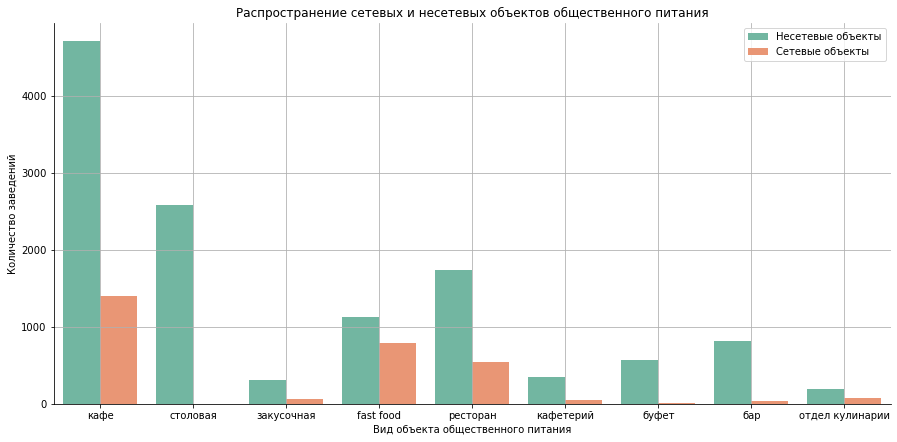

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x = 'object_type', data = df, hue = 'chain_bool')
plt.title('Распространение сетевых и несетевых объектов общественного питания')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Количество заведений')
plt.grid()
plt.legend(['Несетевые объекты', 'Сетевые объекты'])
sns.despine()
#plt.savefig('3.png', dpi = 1000)
plt.show()

По абсолютным данным можно предположить, что сетевое распространение более характерно для кафе, предприятий быстрого обслуживания и ресторанов.

Можно взглянуть на относительный параметр.

In [22]:
data = df.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count').reset_index()

In [23]:
data['ratio'] = round(data['да']/data['нет'], 3)

In [24]:
data.sort_values(by = 'ratio', ascending = False)

chain,object_type,да,нет,ratio
0,fast food,791,1132,0.699
6,отдел кулинарии,78,195,0.400
7,ресторан,544,1741,0.312
4,кафе,1396,4703,0.297
3,закусочная,56,304,0.184
5,кафетерий,52,346,0.150
1,бар,37,819,0.045
2,буфет,11,574,0.019
8,столовая,3,2584,0.001


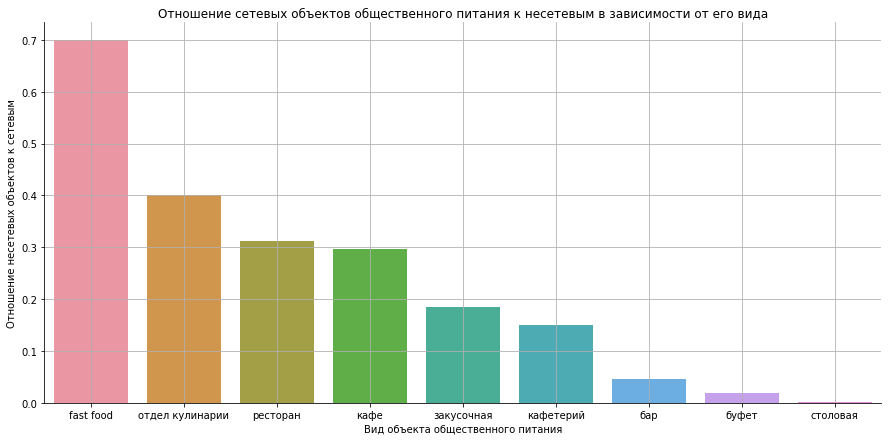

In [25]:
plt.figure(figsize=(15, 7))
sns.barplot(x = 'object_type', y = 'ratio',
            data = data.sort_values(by = 'ratio', ascending = False))
plt.title('Отношение сетевых объектов общественного питания к несетевым в зависимости от его вида')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Отношение несетевых объектов к сетевым')
plt.grid()
#plt.ylim(0, 55)
sns.despine()
#plt.savefig('4.png', dpi = 1000)
plt.show()

Для предприятий быстрого питания более характерно сетевое распространение.

Следом идут магазины с отделом кулинарии, рестораны, кафе, закусочные и кафетерии.

Для баров, буфетов и столовых более характерно несетевое распространение.

## 2.4. Число посадочных мест в сетевых заведениях
Строится гистограмма.

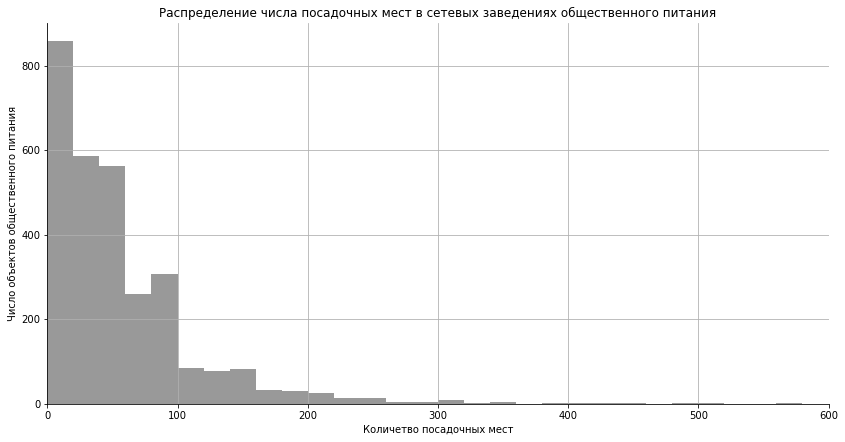

In [26]:
plt.figure(figsize=(14, 7))
sns.distplot(df[df['chain_bool'] == True]['number'], bins = 29, color = 'black', kde = False)
plt.xlim(0, 600)
plt.title('Распределение числа посадочных мест в сетевых заведениях общественного питания')
plt.xlabel('Количетво посадочных мест')
plt.ylabel('Число объектов общественного питания')
plt.grid()
sns.despine()
#plt.savefig('5.png', dpi = 1000)
plt.show()

На гистограмме видно, что в большинстве заведений не более 20-ти посадочных мест.

Заведений, где 40-60 посадочных мест тоже довольно много.

Сетевых объектов общественного питания, где одновременно могут находиться более 100 человек, мало, а заведения с данным параметром более 160-ти находятся в "хвосте" распределения.

Можно посчитать среднее, медиану и моду количества посадочных мест, построить диаграмму размаха.

In [27]:
print('Среднее арифметическое число посадочных мест в сетевых заведениях общественного питания:',
      round(df[df['chain_bool'] == True]['number'].mean()))

Среднее арифметическое число посадочных мест в сетевых заведениях общественного питания: 53


In [28]:
print('Медиана количества посадочных мест в сетевых заведениях общественного питания:',
      int(df[df['chain_bool'] == True]['number'].median()))

Медиана количества посадочных мест в сетевых заведениях общественного питания: 40


In [29]:
print('Мода количества посадочных мест в сетевых заведениях общественного питания:',
      int(df[df['chain_bool'] == True]['number'].mode()))

Мода количества посадочных мест в сетевых заведениях общественного питания: 0


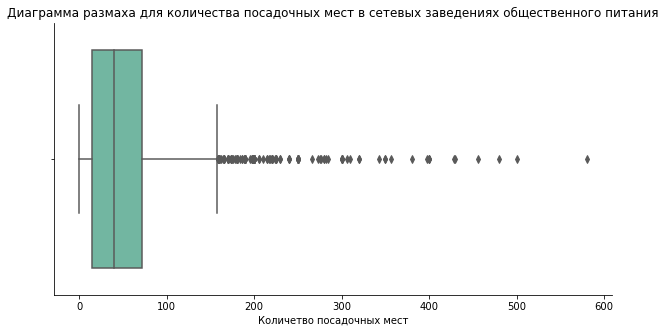

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(df[df['chain_bool'] == True]['number'])
plt.title('Диаграмма размаха для количества посадочных мест в сетевых заведениях общественного питания')
plt.xlabel('Количетво посадочных мест')
sns.despine()
#plt.savefig('6.png', dpi = 1000)
plt.show()

По гистограмме, по значениям среднего, медианы и моды количества посадочных мест и по посроенному "ящику с усами" можно сделать вывод, что заведений с небольшим числом посадочных мест много, а с большим количеством посадочных мест мало.

Можно исключить заведения, в которых нет посадочных мест, т.е. number имеет значение 0. Графики от этого не сильно изменятся, но среднее, медиана и мода должны стать больше.

In [31]:
print('Среднее арифметическое число посадочных мест в сетевых заведениях общественного питания:',
      round(df[(df['chain_bool'] == True) & (df['number'] != 0)]['number'].mean()))

Среднее арифметическое число посадочных мест в сетевых заведениях общественного питания: 58


In [32]:
print('Медиана количества посадочных мест в сетевых заведениях общественного питания:',
      int(df[(df['chain_bool'] == True) & (df['number'] != 0)]['number'].median()))

Медиана количества посадочных мест в сетевых заведениях общественного питания: 43


In [33]:
print('Мода количества посадочных мест в сетевых заведениях общественного питания:',
      int(df[(df['chain_bool'] == True) & (df['number'] != 0)]['number'].mode()))

Мода количества посадочных мест в сетевых заведениях общественного питания: 20


В сетевых заведениях общественного питания чаще всего 20 посадочных мест.

## 2.5. Среднее количество посадочных мест для каждого вида объекта общественного питания

Можно построить boxplot для каждого вида объекта.

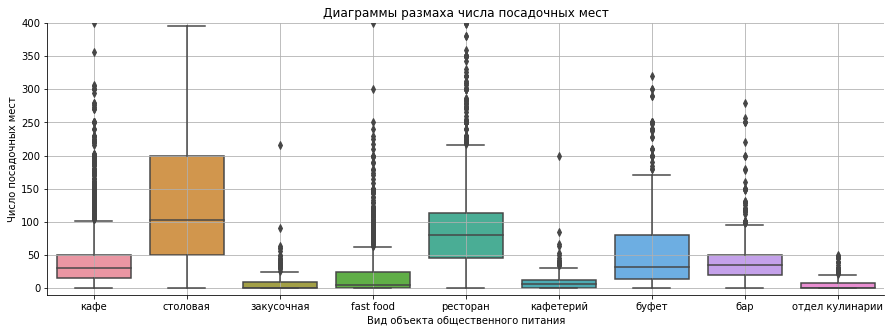

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'object_type', y = 'number', data = df)
plt.ylim(-10, 400)
plt.title('Диаграммы размаха числа посадочных мест')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Число посадочных мест')
plt.grid()
sns.despine()
#plt.savefig('7.png', dpi = 1000)
plt.show()

На диаграммах размаха видно, какое число посадочных мест (медиана и допустимый диапазон) наиболее характерно тому или иному виду заведения.

Можно построить столбчатую диаграмму со средним и медианой числа посадочных мест для каждого вида объекта.

In [35]:
average_number_of_seats = df.groupby('object_type').agg({'number':['mean', 'median']})

In [36]:
average_number_of_seats.columns = ['mean_number', 'median_number']

In [37]:
average_number_of_seats['mean_number'] = round(average_number_of_seats['mean_number']).astype('int')

In [38]:
average_number_of_seats = average_number_of_seats.reset_index()

In [39]:
average_number_of_seats = average_number_of_seats.sort_values(by = 'mean_number')

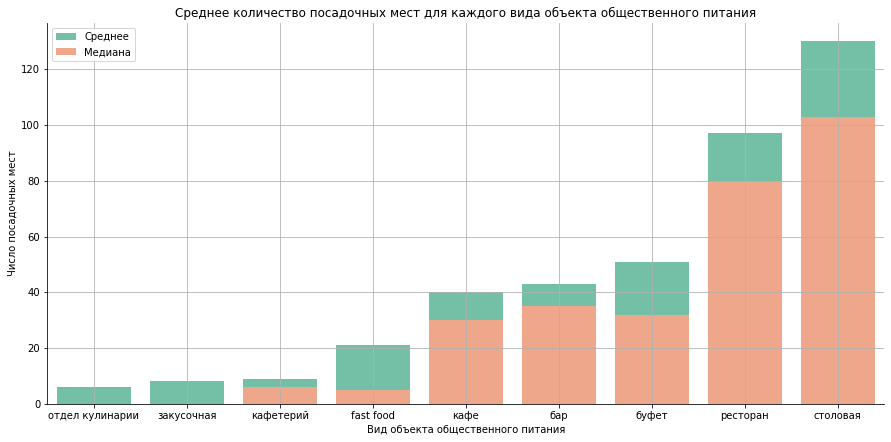

In [40]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(x = 'object_type',
                 y = 'mean_number',
                 data = average_number_of_seats,
                 color = '#66CDAA',
                 label = 'Среднее')

sns.barplot(x = 'object_type',
            y = 'median_number',
            data = average_number_of_seats,
            ax = ax,color = '#FFA07A',
            label = 'Медиана')

plt.title('Среднее количество посадочных мест для каждого вида объекта общественного питания')
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Число посадочных мест')
plt.grid()
plt.legend()
sns.despine()
#plt.savefig('8.png', dpi = 1000)
plt.show()

Если рассматривать среднее и медиану, то больше всего посадочных мест в столовых и ресторанах.

Следом идут буфеты, бары и кафе. Им уступают предприятия быстрого питания.

В отделах кулинарии и закусочных посадочных мест почти нет (медиана равна нулю).

## 2.6. Топ-10 улиц по количеству объектов общественного питания

Некоторые объекты общественного питания не имеют улицы (например город Зеленоград, корпус 1627).

Было создано регулярное выражение, которое находит в адресе объекта:
    - улицу, бульвар, проспект, шоссе, переулок, площадь, проезд, набережную, аллею;
    - линию, посёлок, микрорайон, километр, поселение, квартал, тупик, просеку, территорию;
    - Зеленоград в отдельности.
    
И ещё одно выражение, без посёлков, микрорайонов, километров, поселений, кварталов, территорий и Зеленограда.

И выражение без проспектов и шоссе, т.к. они имеют большую протяжённость и пересекают несколько районов.

In [41]:
expression_loc = '[А-я ё 0-9 -]*улица.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9 ]*бульвар.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9 ]*проспект.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9 ]*шоссе.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*переулок.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*площадь.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*проезд.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*набережная.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*аллея.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*линия.*?[- А-я 0-9 ]*|[- А-я ё 0-9]*посёлок.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*микрорайон.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*километр.*?[- А-я ё 0-9 ]*|[-А-я ё 0-9]*город Зеленоград.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*поселение.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*квартал.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*тупик.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*просек.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*территория.*?[- А-я ё 0-9 ]*'

In [42]:
expression_street = '[- А-я ё 0-9 ]*улица.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9 ]*бульвар.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9 ]*проспект.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9 ]*шоссе.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*переулок.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*площадь.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*проезд.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*набережная.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*аллея.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*линия.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*тупик.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*просек.*?[- А-я ё 0-9 ]*'

In [43]:
expression_street2 = '[- А-я ё 0-9 ]*улица.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9 ]*бульвар.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*переулок.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*площадь.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*проезд.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*набережная.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*аллея.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*линия.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*тупик.*?[- А-я ё 0-9 ]*|[- А-я ё 0-9]*просек.*?[- А-я ё 0-9 ]*'

In [44]:
df['location'] = df['address'].str.findall(expression_loc).str.get(0)
df['street'] = df['address'].str.findall(expression_street).str.get(0)
df['street2'] = df['address'].str.findall(expression_street2).str.get(0)

In [45]:
df.sample(5)

,id,object_name,chain,object_type,address,number,chain_bool,location,street,street2
4883,28778,СТОЛОВАЯ ГИМНАЗИИ 1516,нет,столовая,"город Москва, Широкая улица, дом 1, корпус 1, ...",300,False,Широкая улица,Широкая улица,Широкая улица
13963,212737,Pho Viet,нет,fast food,"город Москва, улица Маросейка, дом 4/2, строен...",18,False,улица Маросейка,улица Маросейка,улица Маросейка
3227,83016,Duck Star'S,нет,бар,"город Москва, Большая Черкизовская улица, дом 6",95,False,Большая Черкизовская улица,Большая Черкизовская улица,Большая Черкизовская улица
4657,28853,ЦЕНТР ОБРАЗОВАНИЯ 1858 ШКОЛА 334,нет,столовая,"город Москва, 5-й квартал Капотня, дом 29",180,False,5-й квартал Капотня,NaN,NaN
6078,23908,Кабул,нет,кафе,"город Москва, улица Миклухо-Маклая, дом 6",48,False,улица Миклухо-Маклая,улица Миклухо-Маклая,улица Миклухо-Маклая


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   chain_bool   15366 non-null  bool  
 7   location     15366 non-null  object
 8   street       14970 non-null  object
 9   street2      12201 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 1.1+ MB


Если рассматривать результаты первого регулярного выражения, получится следующий топ-10:

In [47]:
top = df.groupby('location').agg({'id':'count'}).sort_values(by = 'id', ascending = False).reset_index()

In [48]:
top.columns = ['location', 'number_of_objects']

In [49]:
top.head(10)

,location,number_of_objects
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,163
6,Ленинский проспект,147
7,поселение Сосенское,138
8,проспект Вернадского,132
9,Кутузовский проспект,114


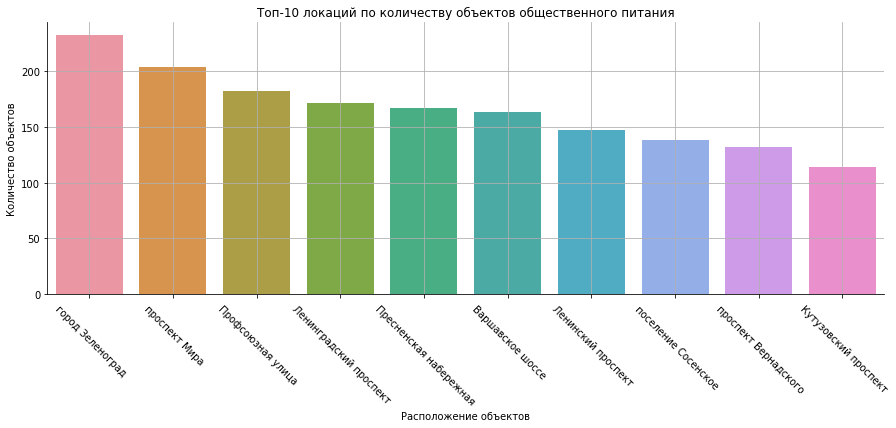

In [50]:
plt.figure(figsize=(15, 5))
sns.barplot(data = top.head(10), x = 'location', y ='number_of_objects')
plt.xticks(rotation=-45)
plt.title('Топ-10 локаций по количеству объектов общественного питания')
plt.xlabel('Расположение объектов')
plt.ylabel('Количество объектов')
plt.grid()
sns.despine()
#plt.savefig('9.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

Топ-10 для второго регулярного выражения:

In [51]:
top2 = df.groupby('street').agg({'id':'count'}).sort_values(by = 'id', ascending = False).reset_index()

In [52]:
top2.columns = ['street', 'number_of_objects']

In [53]:
top2.head(10)

,street,number_of_objects
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Для полученных улиц были найдены соответствующие названия административных округов, т.к. зачастую одна улица пересекает несколько районов.

Проспект Мира - Северо-Восточный административный округ

Профсоюзная улица - Юго-Западный административный округ

Ленинградский проспект - Северный административный округ

Пресненская набережная - Центральный административный округ

Варшавское шоссе - Южный административный округ

Ленинский проспект - Юго-Западный административный округ

Проспект Вернадского - Западный административный округ

Кутузовский проспект - Западный административный округ

Каширское шоссе - Южный административный округ

Кировоградская улица - Южный административный округ

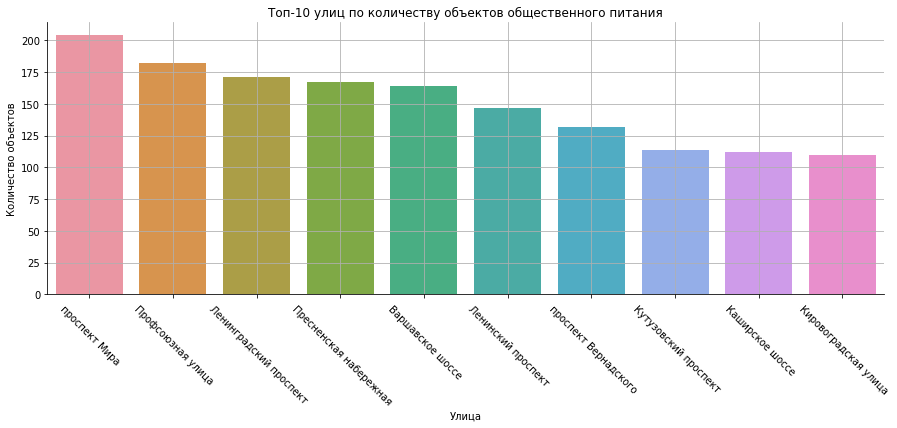

In [54]:
plt.figure(figsize=(15, 5))
sns.barplot(data = top2.head(10), x = 'street', y ='number_of_objects')
plt.xticks(rotation=-45)
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Улица')
plt.ylabel('Количество объектов')
plt.grid()
sns.despine()
#plt.savefig('10.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

Топ-10 для третьего регулярного выражения (без проспектов и шоссе):

In [55]:
top3 = df.groupby('street2').agg({'id':'count'}).sort_values(by = 'id', ascending = False).reset_index()

In [56]:
top3.columns = ['street', 'number_of_objects']

In [57]:
top3.head(10)

,street,number_of_objects
0,Профсоюзная улица,182
1,Пресненская набережная,167
2,Кировоградская улица,110
3,Ходынский бульвар,102
4,улица Новый Арбат,92
5,улица Сущёвский Вал,86
6,улица Ленинская Слобода,85
7,Пятницкая улица,80
8,улица Земляной Вал,79
9,улица Вавилова,78


В данном случае были найдены районы, через которые проходят эти улицы.

Профсоюзная улица - несколько районов (около 6-ти)

Пресненская набережная - Пресненский район

Кировоградская улица - исторический район Чертаново (т.е. Северное, Центральное и Южное Чертаново)

Ходынский бульвар - Хорошёвский район

Улица Новый Арбат - район Арбат

Улица Сущёвский Вал - район Марьина Роща

Улица Ленинская Слобода - Даниловский район

Пятницкая улица	- район Замоскворечье

Улица Земляной Вал -Таганский и Басманный районы

Улица Вавилова - Академический и Ломоносовский районы

Большая часть районов расположена внутри Третьего Транспортного Кольца (либо ТТК проходит через район).

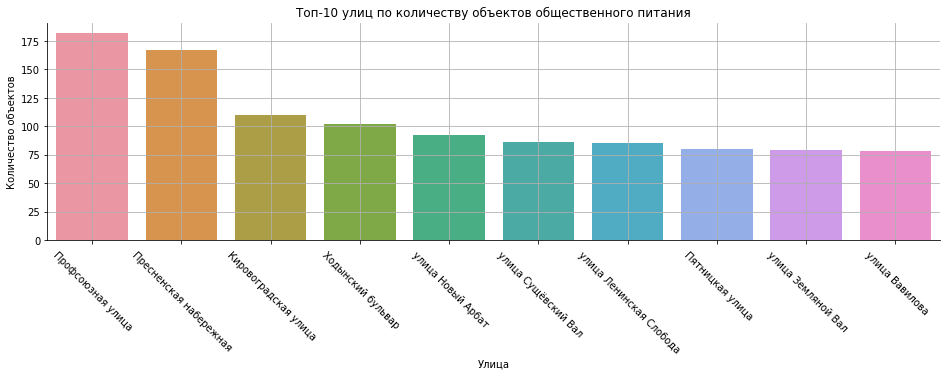

In [58]:
plt.figure(figsize=(16, 4))
sns.barplot(data = top3.head(10), x = 'street', y ='number_of_objects')
plt.xticks(rotation=-45)
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Улица')
plt.ylabel('Количество объектов')
plt.grid()
sns.despine()
#plt.savefig('11.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

## 2.7. Улицы с одним объектом общественного питания

In [59]:
anti_top = df.groupby('location').agg({'id':'count'}).sort_values(by = 'id').reset_index()

In [60]:
anti_top.columns = ['location', 'number_of_objects']

In [61]:
bad_object = anti_top[anti_top['number_of_objects']==1]

In [62]:
bad_object

,location,number_of_objects
0,улица Сергея Макеева,1
1,Верхняя улица,1
2,улица Екатерины Будановой,1
3,Мишина улица,1
4,Михневский проезд,1
...,...,...
584,1-й Монетчиковский переулок,1
585,Садовая-Сухаревская улица,1
586,Садовнический проезд,1
587,Печорская улица,1


Найдено 589 улиц с одним объектом общественного питания. Чтобы найти соответствующие им районы, придётся воспользоваться данными из внешних источников.

In [63]:
from io import BytesIO
import requests

spreadsheet_id = '1WWy-6qS9aleYDQEJ636_yjNnux_c_1pFhbc1oZrNoa8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
outer_data = pd.read_csv(BytesIO(r.content))
outer_data.sample(5)

,streetname,areaid,okrug,area
268,3-й Сыромятнический переулок,18,ЦАО,Таганский район
3084,Ереванская улица,107,ЮАО,Район Царицыно
248,Малый Рогожский переулок,18,ЦАО,Таганский район
1826,Авиационный переулок,54,САО,Район Аэропорт
1822,Проезд N 3,53,Зеленоград,Панфиловский район


Некоторые названия улиц, полученные с помощью регулярного выражения, имеют в начале пробел. Это нужно исправить.

In [64]:
bad_object['location'] = bad_object['location'].apply(lambda x: x.strip())

Теперь можно объединить таблицы.

In [65]:
bad_object_merge = bad_object.merge(outer_data[['streetname', 'area']], left_on = 'location', right_on = 'streetname', how = 'left')

In [66]:
bad_object_merge.sample(5)

,location,number_of_objects,streetname,area
48,Госпитальный переулок,1,Госпитальный переулок,Басманный район
394,поселение Михайлово-Ярцевское,1,NaN,NaN
261,улица Богданова,1,улица Богданова,Район Солнцево
140,улица Клочкова,1,улица Клочкова,Район Фили-Давыдково
275,Тетеринский переулок,1,Тетеринский переулок,Таганский район


In [67]:
bad_object_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 675
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           676 non-null    object
 1   number_of_objects  676 non-null    int64 
 2   streetname         641 non-null    object
 3   area               641 non-null    object
dtypes: int64(1), object(3)
memory usage: 26.4+ KB


Во внешнем источнике не хватает 35-ти улиц.

Можно сформировать топ-10 районов, где больше всего улиц с 1 объектом общественного питания.

In [68]:
bad_area = bad_object_merge.groupby('area').agg({'streetname':'count'}).sort_values(by = 'streetname', ascending = False).reset_index()

In [69]:
bad_area.head(10)

,area,streetname
0,Таганский район,32
1,Район Хамовники,28
2,Басманный район,26
3,Тверской район,25
4,Пресненский район,24
5,Район Арбат,19
6,Мещанский район,18
7,Район Марьина роща,18
8,Район Сокольники,15
9,Район Замоскворечье,15


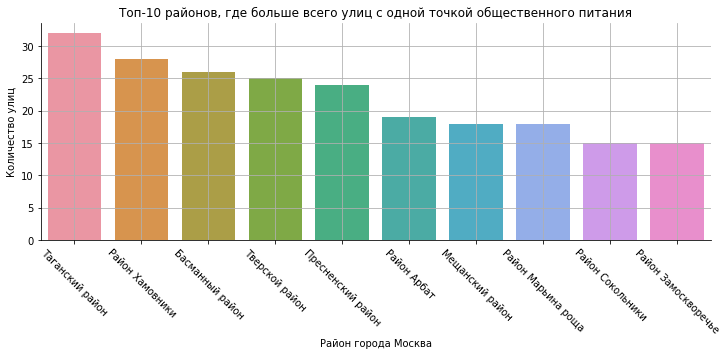

In [70]:
plt.figure(figsize=(12, 4))
sns.barplot(data = bad_area.head(10), x = 'area', y ='streetname')
plt.xticks(rotation=-45)
plt.title('Топ-10 районов, где больше всего улиц с одной точкой общественного питания')
plt.xlabel('Район города Москва')
plt.ylabel('Количество улиц')
plt.grid()
sns.despine()
#plt.savefig('12.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

Часть из перечисленных районов были в списке, составленном по улицам из top3.

Можно изучить конец списка улиц с одной точкой общественного питания.

In [71]:
bad_area.tail(10)

,area,streetname
99,Район Москворечье-Сабурово,1
100,Район Метрогородок,1
101,Район Матушкино-Савелки,1
102,Район Левобережный,1
103,Район Ивановское,1
104,Район Бирюлево Западное,1
105,Район Бибирево,1
106,Молжаниновский район,1
107,Ломоносовский район,1
108,Район Марфино,1


Несколько районов из списка примыкают ко МКАДу, несколько внутри МКАД, один находится за его пределами, один район рядом с Зеленоградом.

## 2.8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Можно объеденить плученные топ-10, но т.к. населённые пункты "город Зеленоград" и "поселение Сосенское" не являются улицами, будут использованы только top2 и top3.

In [72]:
top_all = top2.head(10)

In [73]:
top_all = top_all.append(top3.head(10))

In [74]:
top_all = top_all.drop_duplicates().reset_index(drop = True)

In [75]:
top_all

,street,number_of_objects
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Из таблицы df нужно получить данные о заведениях, расположенных на улицах из полученного списка.

In [76]:
df_top_all = df[df['street'].isin(top_all['street'])]

In [77]:
df_top_all.sample(5)

,id,object_name,chain,object_type,address,number,chain_bool,location,street,street2
14860,215128,Bar BQ,нет,ресторан,"город Москва, Кутузовский проспект, дом 57",45,False,Кутузовский проспект,Кутузовский проспект,NaN
2086,140776,Ресторан «Марукамэ»,нет,ресторан,"город Москва, Пятницкая улица, дом 29",55,False,Пятницкая улица,Пятницкая улица,Пятницкая улица
13140,194582,Точка продажи готовой еды Милти,да,отдел кулинарии,"город Москва, Варшавское шоссе, дом 160",0,True,Варшавское шоссе,Варшавское шоссе,NaN
6433,142433,Сам пришел,нет,ресторан,"город Москва, проспект Вернадского, дом 76А",49,False,проспект Вернадского,проспект Вернадского,NaN
14354,221852,Grano,нет,кафе,"город Москва, проспект Вернадского, дом 6",40,False,проспект Вернадского,проспект Вернадского,NaN


Выполняется группировка по улице и опеределяется среднее и медиана посадочных мест.

In [78]:
group_df_top_all = df_top_all.groupby('street').agg({'number':['mean', 'median']}).reset_index()

In [79]:
group_df_top_all.columns = ['street', 'number_mean', 'number_median']

In [80]:
group_df_top_all['number_mean'] = round(group_df_top_all['number_mean']).astype('int')
group_df_top_all['number_median'] = group_df_top_all['number_median'].astype('int')

In [81]:
group_df_top_all.sample(5)

,street,number_mean,number_median
9,Ходынский бульвар,19,10
16,улица Сущёвский Вал,31,12
5,Ленинский проспект,63,45
6,Пресненская набережная,46,30
14,улица Ленинская Слобода,31,10


Можно объединить таблицы top_all и group_df_top_all.

In [82]:
top_all = top_all.merge(group_df_top_all, on = 'street')

In [83]:
top_all

,street,number_of_objects,number_mean,number_median
0,проспект Мира,204,63,46
1,Профсоюзная улица,182,46,24
2,Ленинградский проспект,171,53,40
3,Пресненская набережная,167,46,30
4,Варшавское шоссе,164,52,30
5,Ленинский проспект,147,63,45
6,проспект Вернадского,132,67,40
7,Кутузовский проспект,114,85,40
8,Каширское шоссе,112,55,25
9,Кировоградская улица,110,60,30


Построение столбчатой диаграммы.

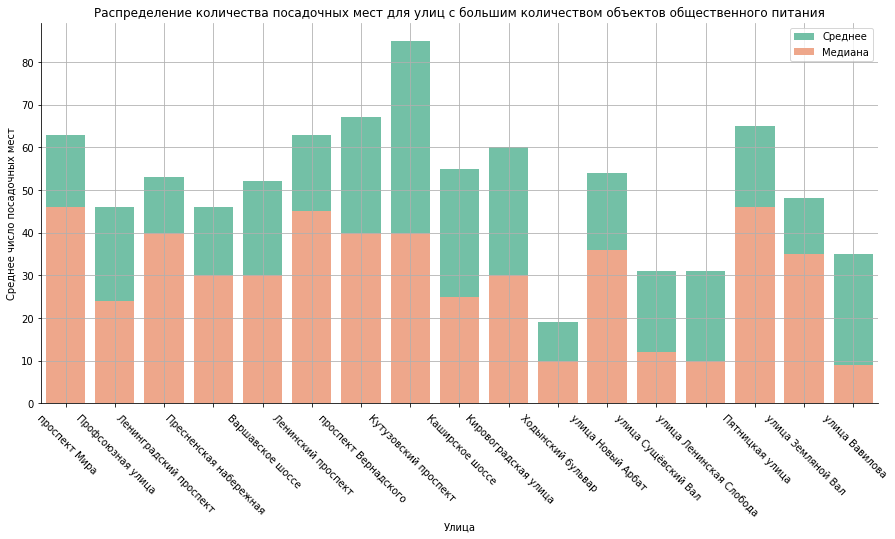

In [84]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(x = 'street',
                 y = 'number_mean',
                 data = top_all,
                 color = '#66CDAA',
                 label = 'Среднее')

sns.barplot(x = 'street',
            y = 'number_median',
            data = top_all,
            ax = ax,color = '#FFA07A',
            label = 'Медиана')

plt.xticks(rotation=-45)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
plt.xlabel('Улица')
plt.ylabel('Среднее число посадочных мест')
plt.grid()
plt.legend()
sns.despine()
#plt.savefig('13.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

По полученной диаграмме трудно сделать какой-либо вывод.

Так, на Кутузовском проспекте 114 объектов общественного питания и в среднем 85	посадочных мест (медиана 40).

А на Ходынском бульваре	102 объекта со средним числом посадочных мест 19 (медиана 10).

Можно посмотреть коэффициенты корреляции Пирсона.

In [85]:
top_all.corr()[:1]

,number_of_objects,number_mean,number_median
number_of_objects,1.0,0.272541,0.412255


Видно, что зависимость между числом объектов и числом посадочных мест положительная и слабая.

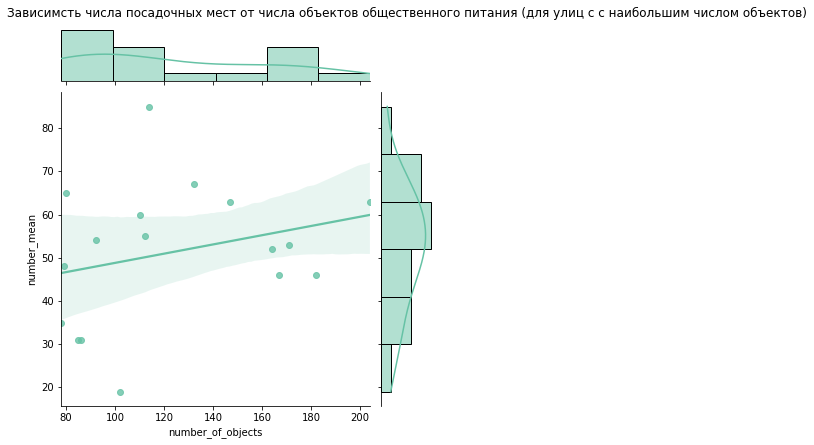

In [86]:
sns.jointplot(x = 'number_of_objects', y = 'number_mean', data = top_all, kind = 'reg')
plt.title('Зависимсть числа посадочных мест от числа объектов общественного питания (для улиц с с наибольшим числом объектов)',
         pad = 75)
plt.xlabel('Число заведений общественного питания')
plt.ylabel('Среднее число посадочных мест')
#plt.savefig('14.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

На графике зависимости показано 17 точек.

Можно построить такой же график для всех улиц (исключив заведения без посадочных мест) и определить коэффициент корреляции.

In [87]:
 all_group_data = df[df['number']!=0].groupby('street').agg({'number':['mean', 'median'], 'id':'count'}).reset_index()

In [88]:
all_group_data.columns = ['street', 'number_mean', 'number_median', 'object_count']

In [89]:
all_group_data['number_mean'] = round(all_group_data['number_mean']).astype('int')
all_group_data['number_median'] = all_group_data['number_median'].astype('int')

In [90]:
all_group_data.sample(5)

,street,number_mean,number_median,object_count
1839,улица Хамовнический Вал,66,60,7
45,1-й переулок Тружеников,60,50,4
275,Басовская улица,24,24,1
1633,улица Липовый Парк,15,14,20
1670,улица Марьинский Парк,107,15,3


Коэффициенты корреляции:

In [91]:
all_group_data.corr()[2:3]

,number_mean,number_median,object_count
object_count,-0.088424,-0.154166,1.0


Если рассматривать все улицы, то зависимость между числом объектов и числом посадочных мест отрицательная и очень слабая.

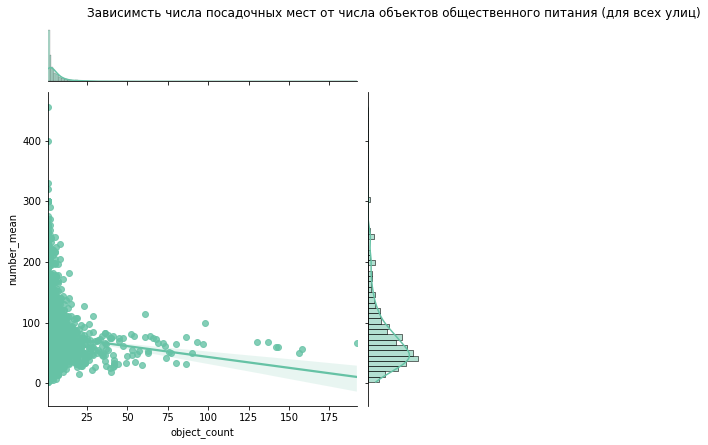

In [92]:
sns.jointplot(x = 'object_count', y = 'number_mean', data = all_group_data, kind = 'reg')
plt.title('Зависимсть числа посадочных мест от числа объектов общественного питания (для всех улиц)',
         pad = 75)
plt.xlabel('Число заведений общественного питания')
plt.ylabel('Среднее число посадочных мест')
#plt.savefig('15.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

На графике зависимости показано 1912 точек.

## 2.9. Выводы и рекомендации

Полученные данные не могут дать ответа на вопрос, насколько сильным будет отток клиентов после утраты интереса к кафе, и как быстро этот интерес пройдёт. Для этого нужно анализировать другие данные (например, количество клиентов за определённый промежуток времени с момента открытия объекта).

Были получены следующие **выводы**:
- кафе занимают примерно 40 % от всех заведений общественного питания Москвы.
- сетевые объекты составляют примерно 20 % от всех заведений общественного питания Москвы.
- на 1 сетевое кафе приходится 3 несетвых.
- если в сетевом объекте общественного питания есть посадочные места, чаще всего их 20.
- допустимый диапазон числа посадочных мест в кафе - от 0 до 100. В среднем в кафе 40 посадочных мест (медиана 30).
- больше всего объектов общественного питания находится у проспектов, шоссе и больших улиц, т.к. они длинные (пресекают несколько районов) и способны вместить от 100 до 200 точек питания.
- если рассматривать улицы поменьше (также с большим числом объектов общественного питания), то они соответсвуют районам, расположенным внутри Третьего Транспортного Кольца (либо ТТК проходит через район).
- связь числа посадочных мест и количества точек общественного питания на одной улице слабая.

Можно дать следующие **рекомендации** для планируемого кафе:
- число посадочных мест от 20 до 40;
- объект должен располагаться в пределах ТТК (например Пресненский район).

# 3. Презентация

Презентация: https://yadi.sk/i/YAjRvBMAhvU0TA